
(ipykernel_launcher.py:5777): Gtk-WARNING **: 21:29:48.826: Locale not supported by C library.
	Using the fallback 'C' locale.


nodes:  50 links  69


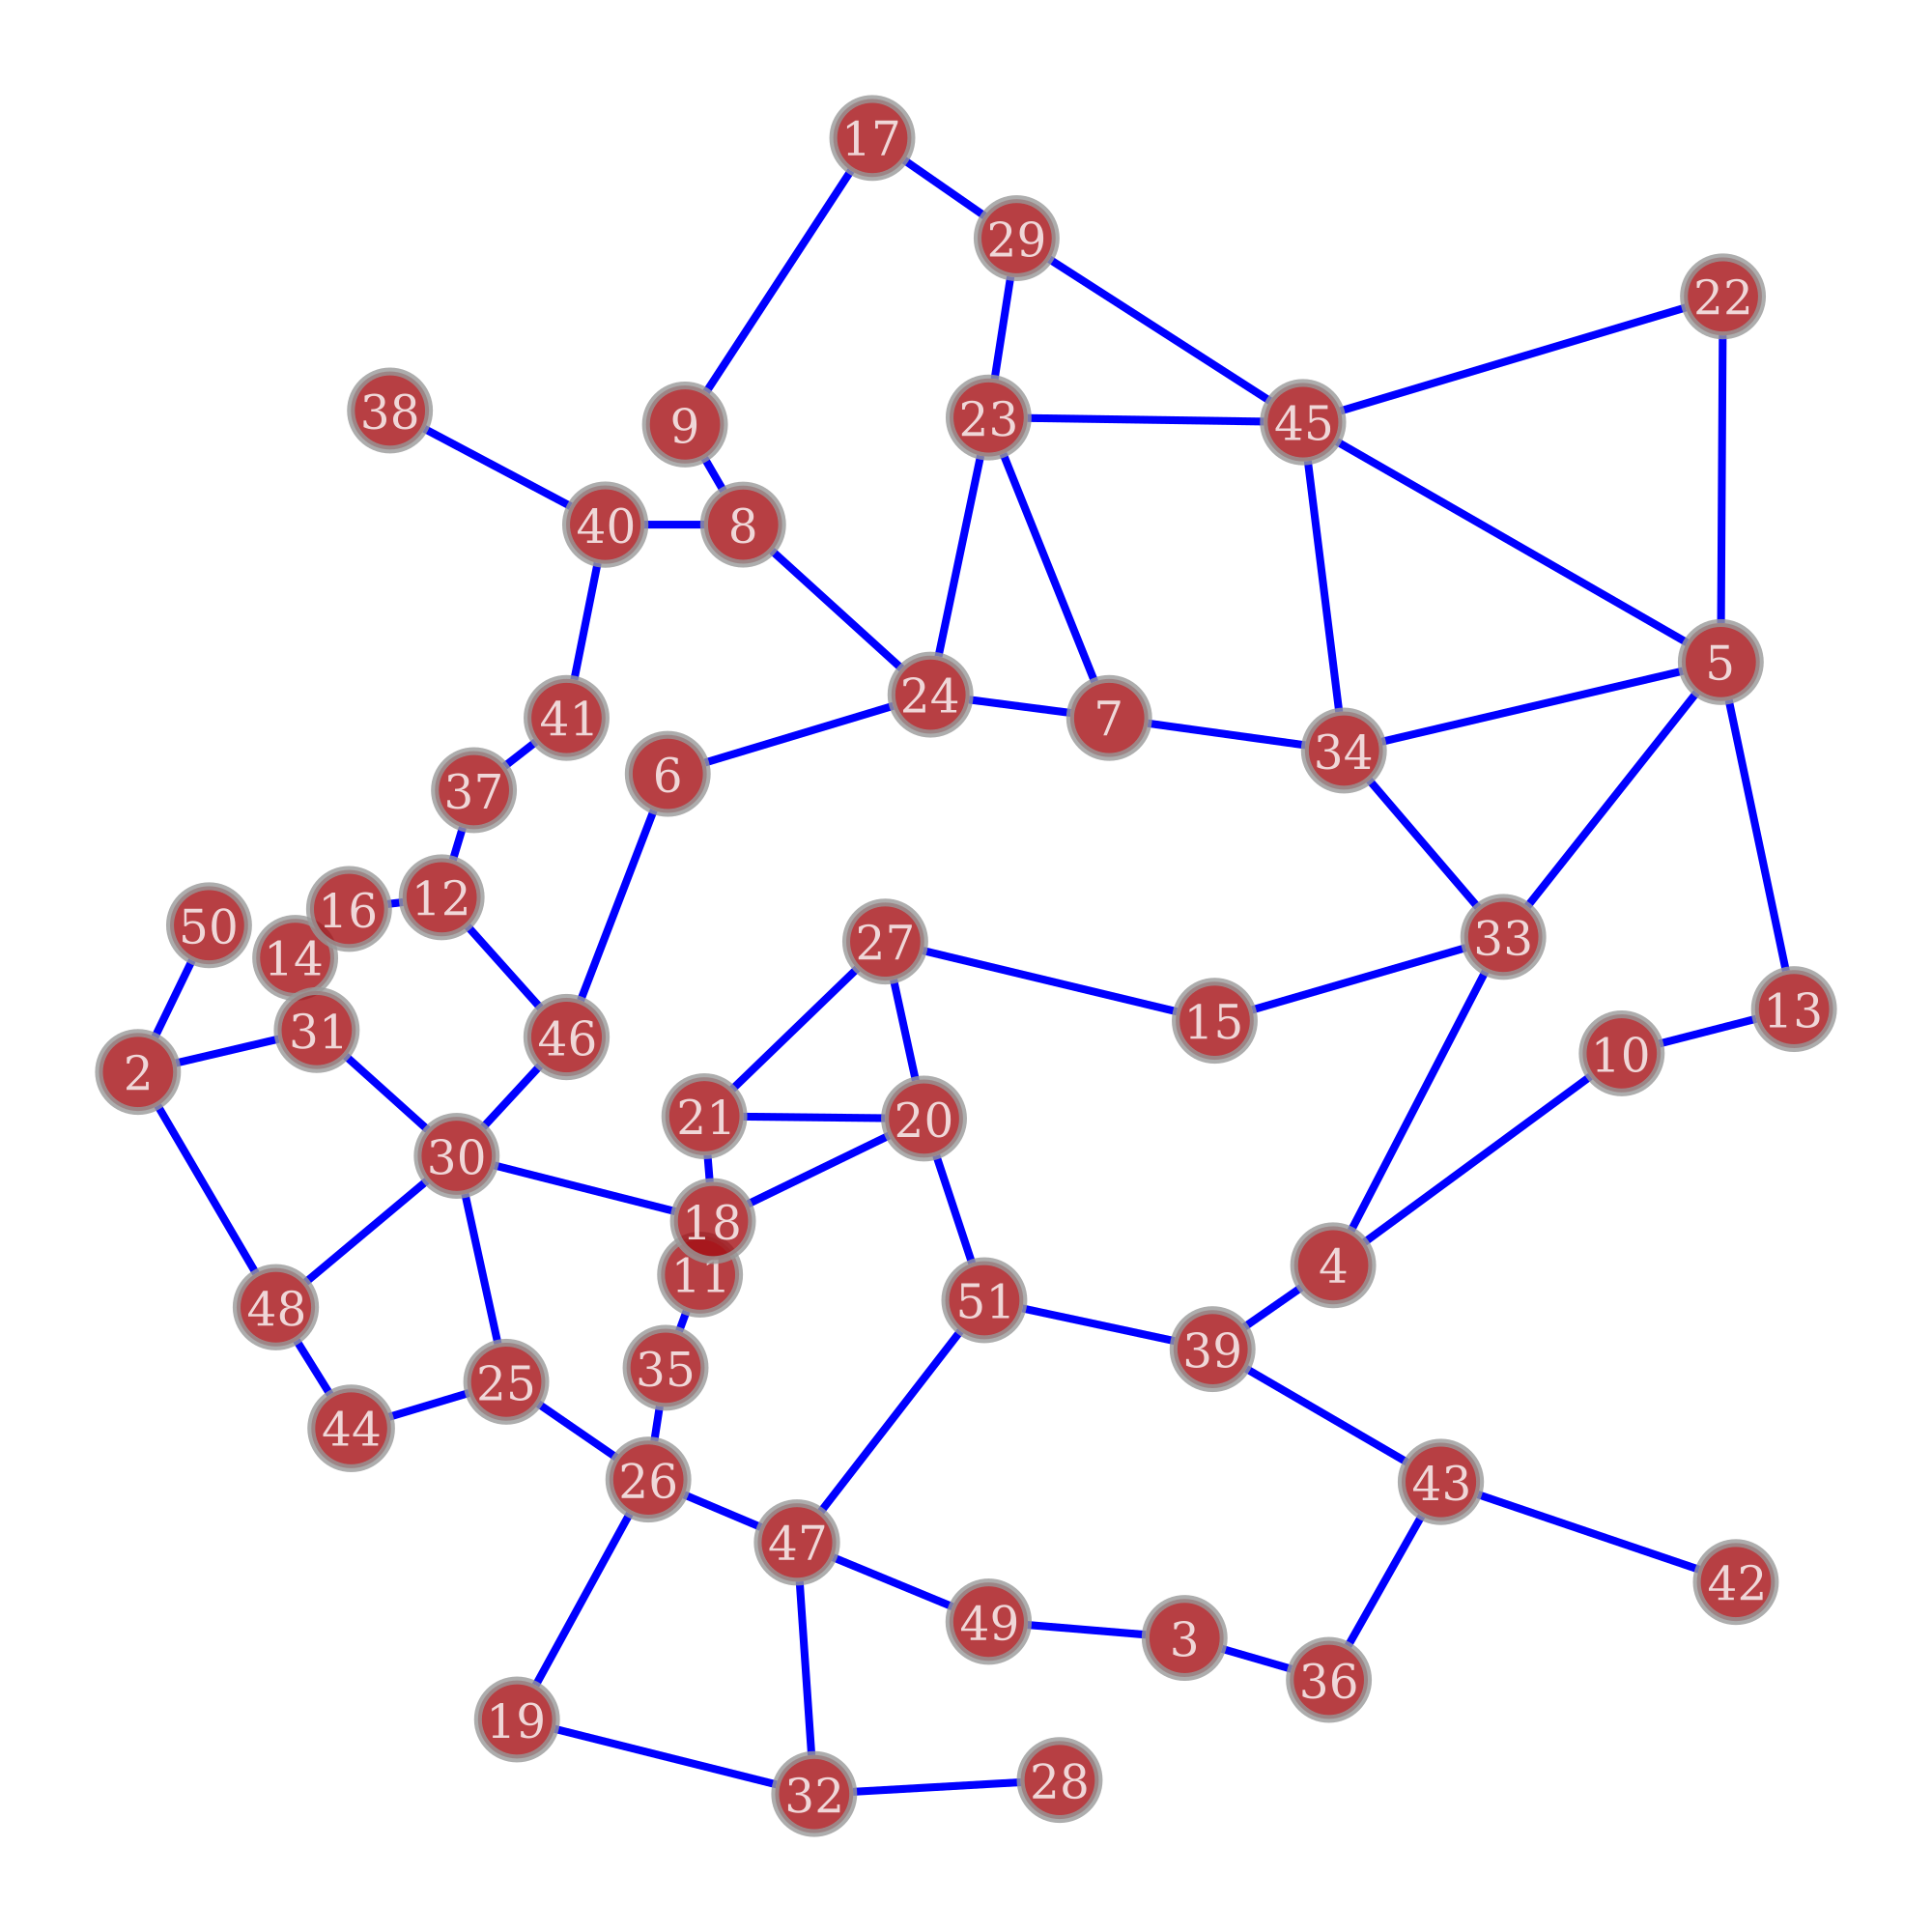

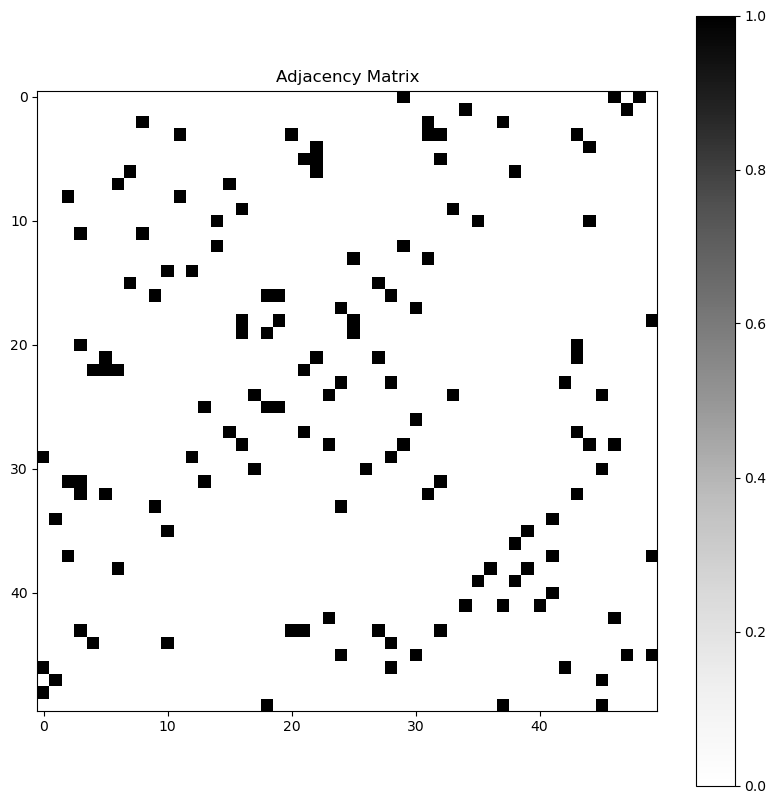

In [1]:
# Pure point graph
from graph_tool import draw
import python_codes.files_operators
import numpy as np
import matplotlib.pyplot as plt

filename1 = "Germany50"

read_graph, read_pos = python_codes.files_operators.read_files(f"../networks_clusters/{filename1}.net")
print("nodes: ", read_graph.num_vertices(), "links ", read_graph.num_edges())
#read_graph.clear_edges()
draw.graph_draw(read_graph, read_pos, vertex_text=read_graph.vertex_properties["number"], edge_color='blue',output_size=(1000, 1000))
draw.graph_draw(read_graph, read_pos, vertex_text=read_graph.vertex_properties["number"], edge_color='blue',output_size=(1000, 1000), output=f'./output_GA/{filename1}.pdf')

# 获取节点数量
num_vertices = read_graph.num_vertices()

# 创建邻接矩阵
adj_matrix = np.zeros((num_vertices, num_vertices))

# 填充邻接矩阵
for edge in read_graph.edges():
    source = int(edge.source())
    target = int(edge.target())
    adj_matrix[source][target] = 1
    adj_matrix[target][source] = 1  # 因为是无向图

# 绘制邻接矩阵
plt.figure(figsize=(10, 10))
plt.imshow(adj_matrix, cmap='Greys', interpolation='none')
plt.title("Adjacency Matrix")
plt.colorbar()
plt.savefig(f'./output_GA/{filename1}_adj_matrix.pdf')
plt.show()

nodes:  50 links  69


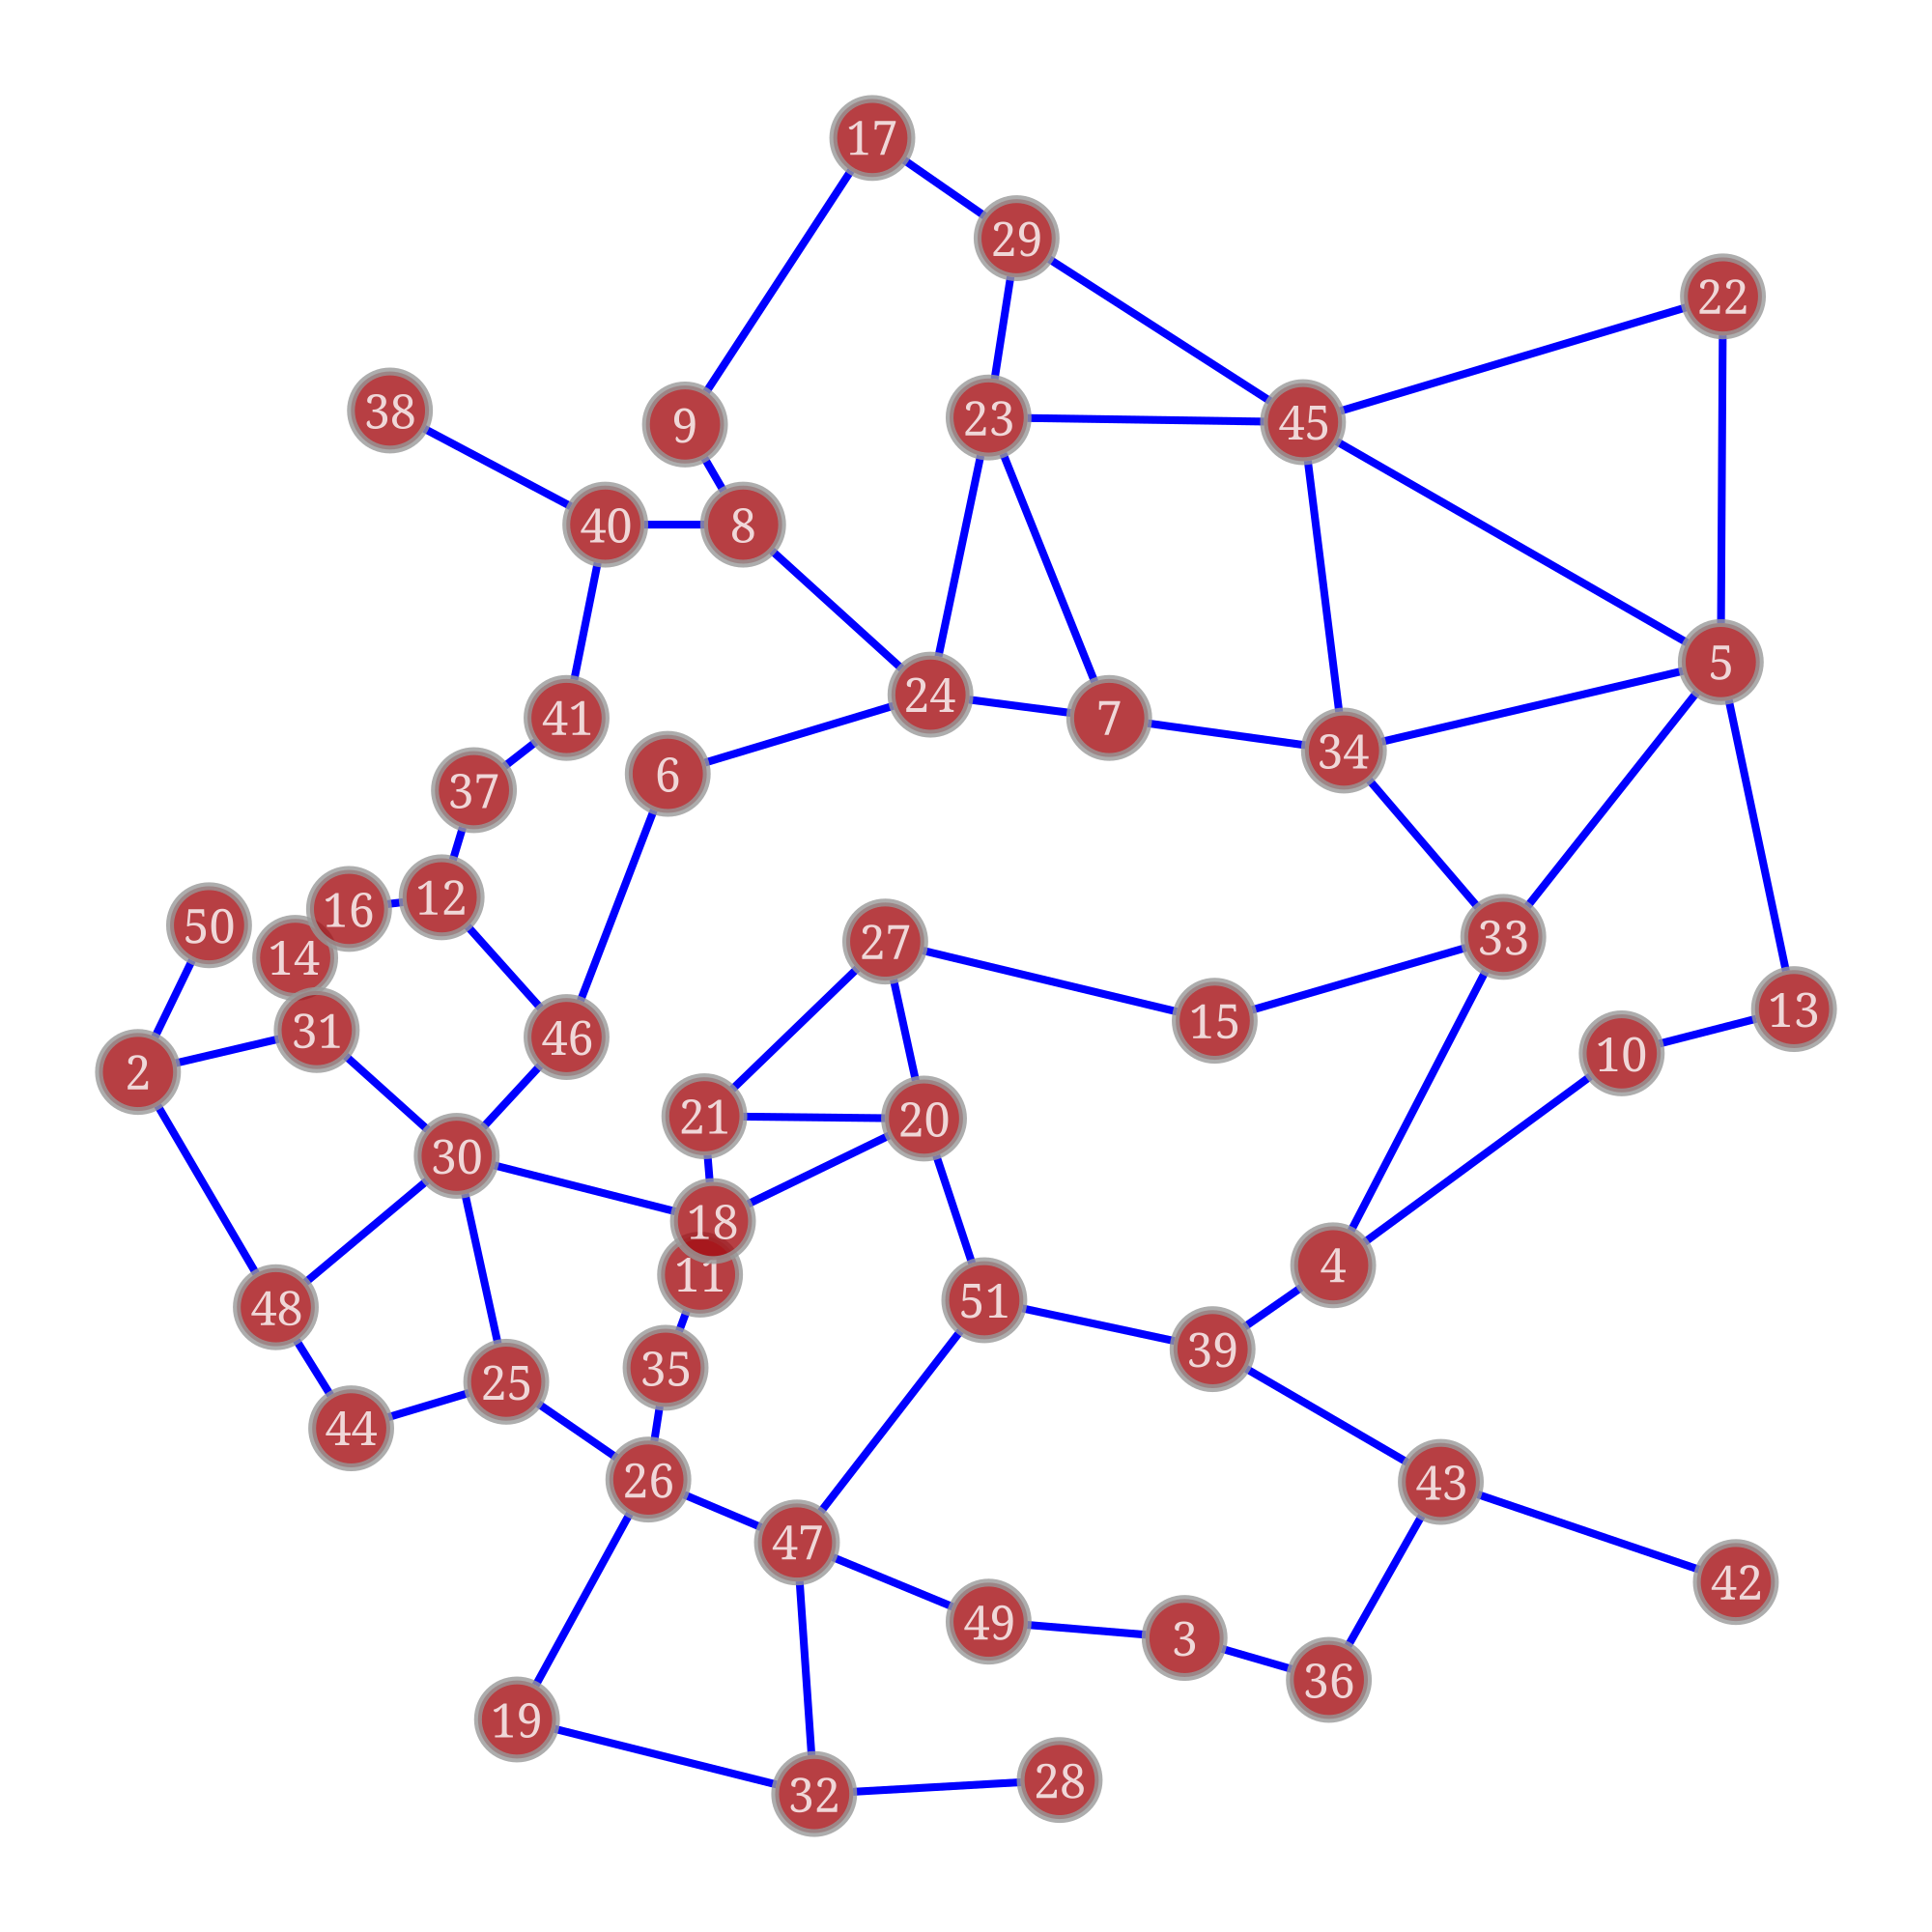

FileNotFoundError: [Errno 2] No such file or directory: './output_GA/Germany50.pdf'

In [1]:
from graph_tool import draw
import python_codes.files_operators
import numpy as np
import csv

filename1 = "Germany50"

# 读取网络图像
read_graph, read_pos = python_codes.files_operators.read_files(f"../networks_clusters/{filename1}.net")
print("nodes: ", read_graph.num_vertices(), "links ", read_graph.num_edges())

# 绘制网络图像
draw.graph_draw(read_graph, read_pos, vertex_text=read_graph.vertex_properties["number"], edge_color='blue', output_size=(1000, 1000))
draw.graph_draw(read_graph, read_pos, vertex_text=read_graph.vertex_properties["number"], edge_color='blue', output_size=(1000, 1000), output=f'./output_GA/{filename1}.pdf')

# 获取节点的显示序号
vertex_numbers = read_graph.vertex_properties["number"]

# 创建顶点序号列表
node_indices = [int(vertex_numbers[v]) for v in read_graph.vertices()]

# 创建邻接矩阵
num_vertices = len(node_indices)
adj_matrix = np.zeros((num_vertices, num_vertices))

# 填充邻接矩阵
for edge in read_graph.edges():
    source = int(vertex_numbers[edge.source()])  # 获取顶点的显示序号
    target = int(vertex_numbers[edge.target()])  # 获取顶点的显示序号
    adj_matrix[node_indices.index(source)][node_indices.index(target)] = 1
    adj_matrix[node_indices.index(target)][node_indices.index(source)] = 1  # 因为是无向图

# 生成CSV文件
with open(f'./output_GA/csv/{filename1}_adj_matrix.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    # 写入表头
    header = ["Node"] + [str(node) for node in node_indices]
    writer.writerow(header)
    
    # 写入每行的邻接矩阵数据
    for i in range(num_vertices):
        row = [str(node_indices[i])] + list(adj_matrix[i])
        writer.writerow(row)

print(f"Adjacency matrix has been saved to ./output_GA/csv/{filename1}_adj_matrix.csv")
